In [5]:
!pip install pandas_datareader

In [6]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/60/bf/70efe5138327c7ccf34f0a870ac97d41d3c06fecb2ec8dc2060ff39aadc9/yfinance-0.2.30-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.30-py2.py3-none-any.whl.metadata (11 kB)
Note: you may need to restart the kernel to use updated packages.


  Using cached frozendict-2.3.8-cp39-cp39-win_amd64.whl (35 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached yfinance-0.2.30-py2.py3-none-any.whl (65 kB)


## Importing Libraries 

In [7]:
#Basics library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

from pandas_datareader.data import DataReader#to retrieve financial data

import warnings
warnings.simplefilter("ignore")

## Download apple stock prices 

In [11]:
end = datetime.now()
start = datetime(2018, end.month, end.day)
dataset = yf.download("AAPL", start, end)

[*********************100%%**********************]  1 of 1 completed


In [12]:
dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-04,57.695000,58.087502,56.682499,56.997501,54.588417,128168000
2018-10-05,56.990002,57.102501,55.145000,56.072498,53.702522,134322000
2018-10-08,55.552502,56.200001,55.049999,55.942501,53.578018,118655600
2018-10-09,55.910000,56.817501,55.562500,56.717499,54.320271,107564000
2018-10-10,56.365002,56.587502,54.012501,54.090000,51.803822,167962400
...,...,...,...,...,...,...
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400
2023-09-29,172.020004,173.070007,170.339996,171.210007,171.210007,51814200


In [65]:
import yfinance as yf
import pandas as pd

symbol = 'AAPL'

stock_data = yf.download(symbol, period='1d', interval='1m')

print(stock_data.head())

minute_counts = stock_data.groupby(stock_data.index).size()
print(minute_counts)
#To get the frequncy count of particular data

[*********************100%%**********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-10-03 09:30:00-04:00  172.255005  172.850006  172.210007  172.630005   
2023-10-03 09:31:00-04:00  172.630005  172.750000  172.460007  172.570007   
2023-10-03 09:32:00-04:00  172.550003  172.770004  172.391403  172.759995   
2023-10-03 09:33:00-04:00  172.754105  172.929993  172.720001  172.729996   
2023-10-03 09:34:00-04:00  172.729996  172.868500  172.649994  172.725006   

                            Adj Close   Volume  
Datetime                                        
2023-10-03 09:30:00-04:00  172.630005  1267514  
2023-10-03 09:31:00-04:00  172.570007   178591  
2023-10-03 09:32:00-04:00  172.759995   183101  
2023-10-03 09:33:00-04:00  172.729996   143757  
2023-10-03 09:34:00-04:00  172.725006   127987  
Datetime
2023-10-03 09:30:00-04:00    1
2023-10-

In [ ]:
#As we are targetting towards high column

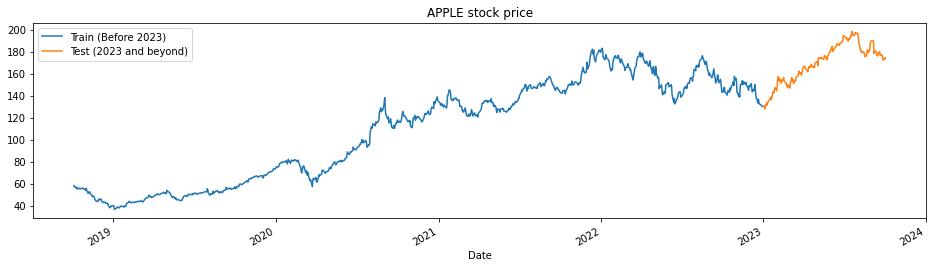

In [20]:
tstart = 2018
tend = 2022

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("APPLE stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)

In [21]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"]
    test = dataset.loc[f"{tend+1}":, "High"]
    return train, test

In [22]:
train_data, test_data = train_test_split(dataset, tstart, tend)
print(test_data)


Test Data:
Date
2023-01-03    130.899994
2023-01-04    128.660004
2023-01-05    127.769997
2023-01-06    130.289993
2023-01-09    133.410004
                 ...    
2023-09-27    173.039993
2023-09-28    172.029999
2023-09-29    173.070007
2023-10-02    174.300003
2023-10-03    173.630005
Name: High, Length: 189, dtype: float64


In [23]:
def train_test_split_values(dataset, tstart, tend):
    train, test =  train_test_split(dataset, tstart, tend)
    return train.values, test.values

training_set, test_set = train_test_split_values(dataset, tstart, tend)

In [24]:
test_set

array([130.8999939 , 128.66000366, 127.76999664, 130.28999329,
       133.41000366, 131.25999451, 133.50999451, 134.25999451,
       134.91999817, 137.28999329, 138.61000061, 136.25      ,
       138.02000427, 143.32000732, 143.16000366, 142.42999268,
       144.25      , 147.22999573, 145.55000305, 144.33999634,
       146.61000061, 151.17999268, 157.38000488, 153.1000061 ,
       155.22999573, 154.58000183, 154.33000183, 151.33999634,
       154.25999451, 153.77000427, 155.5       , 156.33000183,
       153.        , 151.30000305, 149.94999695, 150.33999634,
       147.19000244, 149.16999817, 149.08000183, 147.22999573,
       146.71000671, 151.11000061, 156.30000305, 154.02999878,
       153.47000122, 154.53999329, 150.94000244, 153.13999939,
       153.3999939 , 153.25      , 156.46000671, 156.74000549,
       157.82000732, 159.3999939 , 162.13999939, 161.55000305,
       160.33999634, 160.77000427, 158.49000549, 161.05000305,
       162.47000122, 165.        , 166.28999329, 166.83

In [25]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.14782268],
       [0.14109959],
       [0.1349396 ],
       ...,
       [0.64568969],
       [0.64193566],
       [0.63831817]])

## Data Preparation 

In [26]:
def split_sequence(sequence, window):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + window
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

window_size = 60
features = 1

X_train, y_train = split_sequence(training_set_scaled, window_size)

In [29]:
y_train

array([[0.02240462],
       [0.        ],
       [0.00482902],
       ...,
       [0.64568969],
       [0.64193566],
       [0.63831817]])

In [30]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [31]:
X_train

array([[[0.14782268],
        [0.14109959],
        [0.1349396 ],
        ...,
        [0.01885537],
        [0.02184152],
        [0.02327486]],

       [[0.14109959],
        [0.1349396 ],
        [0.13915433],
        ...,
        [0.02184152],
        [0.02327486],
        [0.02240462]],

       [[0.1349396 ],
        [0.13915433],
        [0.13758447],
        ...,
        [0.02327486],
        [0.02240462],
        [0.        ]],

       ...,

       [[0.72786844],
        [0.74936864],
        [0.75728621],
        ...,
        [0.6697836 ],
        [0.6551771 ],
        [0.64828341]],

       [[0.74936864],
        [0.75728621],
        [0.75837821],
        ...,
        [0.6551771 ],
        [0.64828341],
        [0.64568969]],

       [[0.75728621],
        [0.75837821],
        [0.7280732 ],
        ...,
        [0.64828341],
        [0.64568969],
        [0.64193566]]])

## Model training & Testing LSTM neural network 

In [32]:
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(window_size, features)))
model_lstm.add(Dense(25))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 125)               63500     
                                                                 
 dense (Dense)               (None, 25)                3150      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 66,676
Trainable params: 66,676
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_lstm.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 11s 97ms/step - loss: 0.0379
Epoch 2/15
32/32 [==============================] - 3s 91ms/step - loss: 0.0014
Epoch 3/15
32/32 [==============================] - 3s 88ms/step - loss: 7.6821e-04
Epoch 4/15
32/32 [==============================] - 3s 105ms/step - loss: 7.5355e-04
Epoch 5/15
32/32 [==============================] - 3s 105ms/step - loss: 7.7706e-04
Epoch 6/15
32/32 [==============================] - 3s 100ms/step - loss: 7.2852e-04
Epoch 7/15
32/32 [==============================] - 3s 105ms/step - loss: 7.1776e-04
Epoch 8/15
32/32 [==============================] - 3s 105ms/step - loss: 7.0880e-04
Epoch 9/15
32/32 [==============================] - 3s 81ms/step - loss: 7.1643e-04
Epoch 10/15
32/32 [==============================] - 3s 81ms/step - loss: 6.5469e-04
Epoch 11/15
32/32 [==============================] - 3s 85ms/step - loss: 6.4804e-04
Epoch 12/15
32/32 [==============================] - 3s 89ms/step - loss: 6.

In [34]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - window_size :].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [35]:
X_test, y_test = split_sequence(inputs, window_size)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
predicted_stock_price = model_lstm.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y_test = sc.inverse_transform(y_test)

6/6 [==============================] - 2s 35ms/step


In [36]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

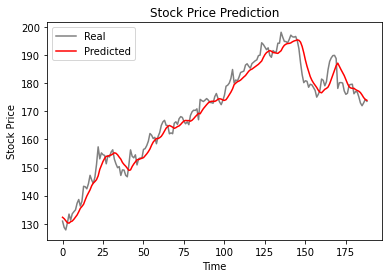

In [47]:
plot_predictions(y_test,predicted_stock_price)

In [38]:
return_rmse(y_test,predicted_stock_price)

The root mean squared error is 3.46.


## GRU 

In [39]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(window_size, features)))
model_gru.add(Dense(units=1))

model_gru.compile(optimizer="adam", loss="mse")

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 125)               48000     
                                                                 
 dense_2 (Dense)             (None, 1)                 126       
                                                                 
Total params: 48,126
Trainable params: 48,126
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_gru.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 9s 74ms/step - loss: 0.0292
Epoch 2/10
32/32 [==============================] - 2s 78ms/step - loss: 0.0014
Epoch 3/10
32/32 [==============================] - 3s 78ms/step - loss: 4.5424e-04
Epoch 4/10
32/32 [==============================] - 3s 78ms/step - loss: 4.3682e-04
Epoch 5/10
32/32 [==============================] - 3s 78ms/step - loss: 4.2301e-04
Epoch 6/10
32/32 [==============================] - 3s 81ms/step - loss: 4.0680e-04
Epoch 7/10
32/32 [==============================] - 3s 80ms/step - loss: 3.9453e-04
Epoch 8/10
32/32 [==============================] - 2s 75ms/step - loss: 3.7213e-04
Epoch 9/10
32/32 [==============================] - 2s 73ms/step - loss: 3.6314e-04
Epoch 10/10
32/32 [==============================] - 2s 78ms/step - loss: 3.6777e-04


In [41]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

6/6 [==============================] - 0s 12ms/step


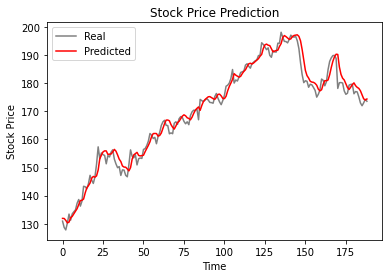

In [42]:
plot_predictions(y_test, GRU_predicted_stock_price)

In [48]:
return_rmse(y_test,GRU_predicted_stock_price)

The root mean squared error is 2.70.
